# **Problem set 2** - Machine Learning for Physics and Astronomy 2023/2024, UvA
---




- The total sheet gives 26 points
- Deadline for submitting your results is **Wed 17/04/2024, 23:59**
- **IMPORTANT**: Specify if/how AI was used to solve the exercises by filling the corresponding "Usage of AI" comments. Anything between "No" (if applicable) and a short paragraph reflecting how AI was used is fine. Failing to do so faithfully will result in the substraction of points.

## Chapter 3: Inference and Bayes nets (16 points)

### 3.1 Inverse Sampling (2 points)

*Topics: Inverse transform sampling*

**Reading material: Murphy 23.2.1**

(2 points) Consider the target exponential pdf $p(x)=\lambda e^{-\lambda x}$, where $\lambda$ is the rate parameter. Define a function that, using the inverse transform method, generates samples from the exponential distribution.

Choosing $\lambda =0.5$ and a sample size of $1000$, plot the histogram of the sampled data and overlay the theoretical exponential distribution curve on top.

Hint: You will need to use the function `np.random.uniform`

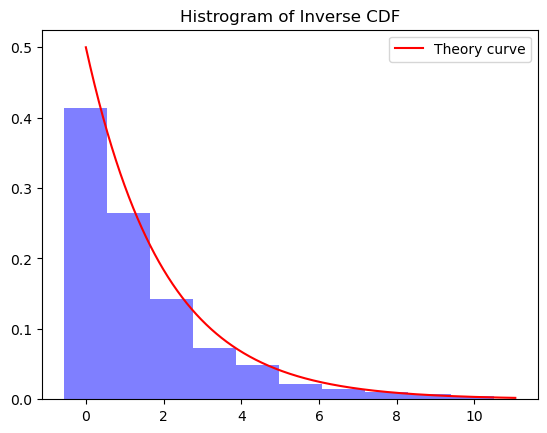

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def func_inv(u,rate):
    return -np.log(1 -u)/rate

def inverse_transform(rate, sample_size):
    u = np.random.uniform(low=0.0, high=1.0, size=sample_size)
    x  = func_inv(u, rate)
    counts, bins = np.histogram(x)
    norm_counts = counts/np.sum(counts)
    
    x_samp_array = np.linspace(0, np.max(x), sample_size)
    theory_curve = rate * np.exp(-rate * (x_samp_array))
    plt.bar(bins[:-1], norm_counts, width=np.diff(bins), alpha=0.5, color='b')
    plt.plot(x_samp_array, theory_curve, label='Theory curve',color='r')
    plt.title("Histrogram of Inverse CDF")
    plt.legend()
    plt.show()
    return None
Q1 = inverse_transform(rate=0.5, sample_size=1000)

Usage of AI: *I Asked ChatGPT for the Histogram bin template*

### 3.2 Metropolis Hastings & credible intervals (10 points)



*Topics: Multivariate normal, Metropolis Hastings and marginal distributionsm Credible intervals, Highest posterior density region*

**Reading material: Murphy 5.2.2, 5.2.2.1, 24.3**

We will explore a 2-dim and bimodal probability density function.

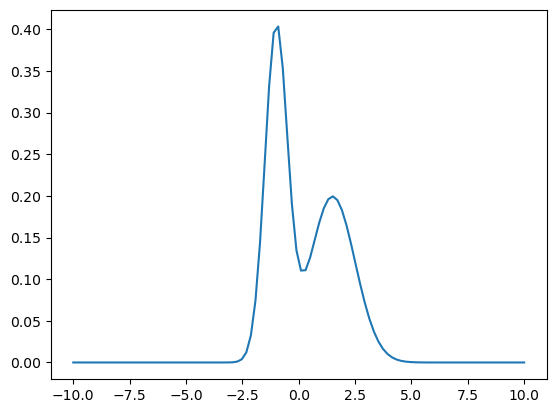

In [2]:
# provided

# The likelihood function is given
#THIS IS P(X)

def pdf_bimodal(x):
    """Bimodal pdf
    X should be a vector"""
    sigma1 = 1.0
    sigma2 = 0.5
    pdf = 0.5/(np.sqrt(2*np.pi*sigma1**2))*np.exp(-0.5*((x-1.5)**2).sum()/sigma1**2)  +  0.5/(np.sqrt(2*np.pi*sigma2**2))*np.exp(-0.5*((x+1.0)**2).sum()/sigma2**2)
    return pdf
x = np.linspace(-10,10,100)
array = [pdf_bimodal(xi) for xi in x]
#x_random = np.random.randn(100,1)
plt.plot(x, array)
#plt.plot(x, x_random)
plt.show()

1. Write your own Metropolis Hastings algorithm. (4 points)

- The proposal distribution is supposed to be a $D=2$ dimensional isotropic Gaussian with variance $\sigma^2$. -- THIS IS Q(x)
- Given some pdf, the algorithm should produce and return a given number of chain points $N$, starting with some initial vector $\mathbf{x}_0$. The result should be returned as a $N\times D$ array.
- The algorithm should also evaluate and print the acceptance rate (fraction of accepted transitions over total number of steps).

Hints: Use `np.random.randn`, `np.random.rand`, `np.array` where appropriate. Write the algorithm such that it works for any dimensions of $\mathbf{x}_0$.

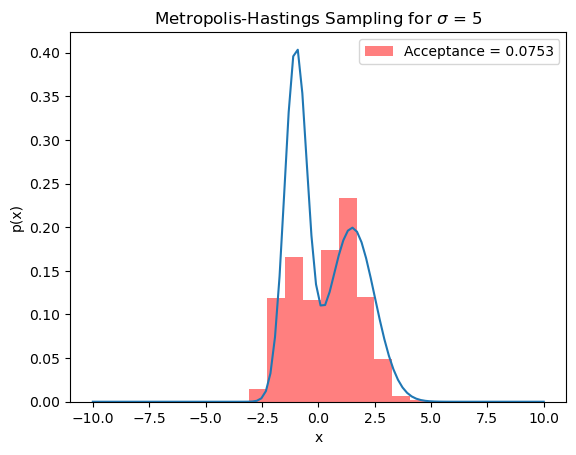

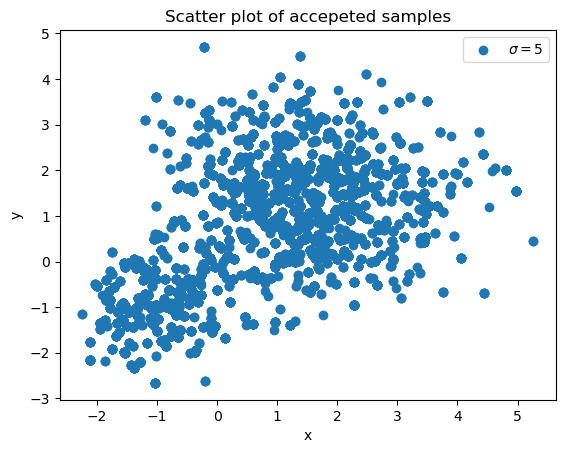

The Acceptance rate is 0.0753


In [3]:
import numpy as np
import matplotlib.pyplot as plt
def q_proposal(x_state_vector,sigma):
    #Define a proposal gaussian
    covariance = np.diag([sigma**2] * len(x_state_vector))
    q_state = np.random.multivariate_normal(x_state_vector, covariance)
    return q_state

def MetropolisHastings(pdf, N, x_init, sigma,plotting,chain):
    #initalize x_0
    x_state = x_init # any N dimension vector
    acceptance = 0
    accepted_samples = []
    for n in range(0,N):
        # for N dimension cases
        #sample x and y prime
        x_prime = q_proposal(x_state, sigma)
        px_prime = pdf(x_prime)
        #calculate the alpha
        #this one is  a fat guess
        
        alpha = (px_prime)/pdf(np.array(x_state))
        r = min(1, alpha)
        u = np.random.uniform(low=0.0, high=1.0)
        if u < r:
            x_state = x_prime
            acceptance += 1
        elif u >=r:
            x_state =x_state
    #calculate the acceptance rate
        accepted_samples.append(x_state)
    acceptance_rate = np.array(acceptance/N)
    acceptance_label = "Acceptance = " + str(f"{acceptance_rate}")
    #make a histograms of the counts
    counts, bins = np.histogram(accepted_samples)
    norm_counts = counts/np.sum(counts)
    #plt.bar(bins[:-1], norm_counts, width=np.diff(bins), alpha=0.5, color='r',label=acceptance_label)
    accepted_samples = np.array(accepted_samples)
    #plot the bimodal
    bimodal_x = np.linspace(-10,10,100)
    bimodal_array = [pdf(xi) for xi in x]

    if plotting == True:
        plt.plot(bimodal_x, bimodal_array)
        plt.bar(bins[:-1], norm_counts, width=np.diff(bins), alpha=0.5, color='r',label=acceptance_label)
        plt.xlabel('x')
        plt.ylabel('p(x)')
        plt.title('Metropolis-Hastings Sampling for $\sigma$ = '+str(sigma))
        plt.legend()
    plt.show()
    if chain == True:
        plt.scatter(accepted_samples[:,0], accepted_samples[:,1],label='$\sigma = $'+str(sigma))
        plt.title("Scatter plot of accepeted samples")
        plt.ylabel('y')
        plt.xlabel('x')
        plt.legend()
    plt.show()
    print(f"The Acceptance rate is {acceptance_rate}")


    
   # accepted_samples = np.array(accepted_samples)
    return accepted_samples
    
test = MetropolisHastings(pdf_bimodal, 10000, (0.1,0), 5,True,chain=True)


# This also works for different length vectors,but i don't think the results mean much, se below

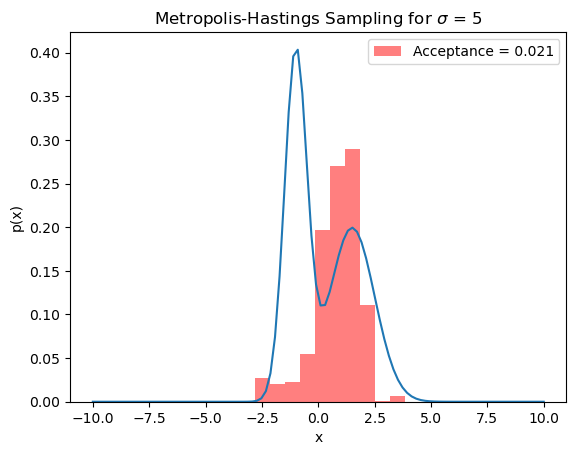

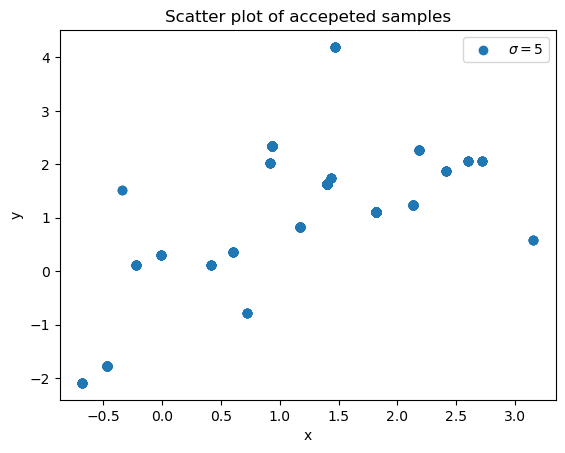

The Acceptance rate is 0.021


In [4]:
three_D_vector = MetropolisHastings(pdf_bimodal, 1000, (0,0,1), 5,True,chain=True)

2. Explore the above bimodal distribution. (3 points)
- Show resulting chain for $N=10000$ and for five proposal widths in the range $\sigma \in [0.01, 100.]$.  
- Based on the acceptance rate and visual inspection of the result, argue what parameters work here best.
- What are the problems with too low or too high values of $\sigma$?
- Also discuss what happens when you start with initial values far away from the optimum. This initial phase is called "burn in phase".

Hints: use `plt.scatter`

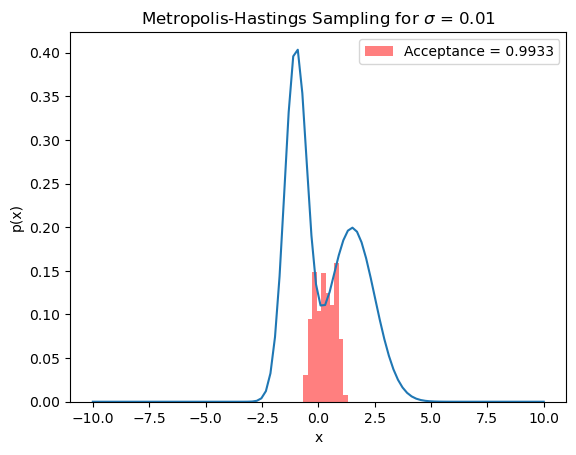

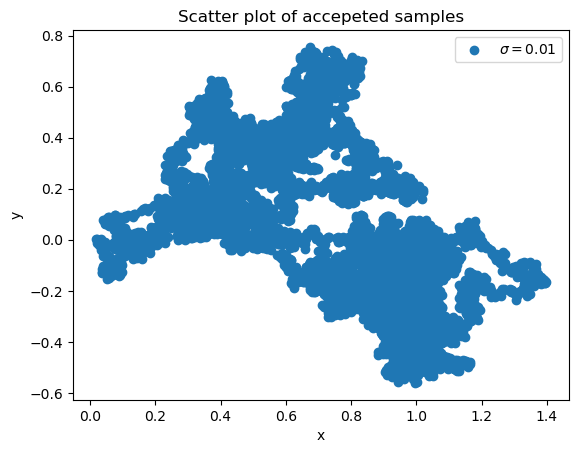

The Acceptance rate is 0.9933


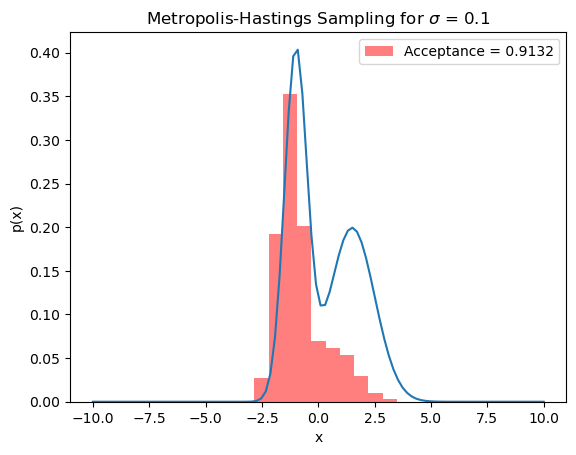

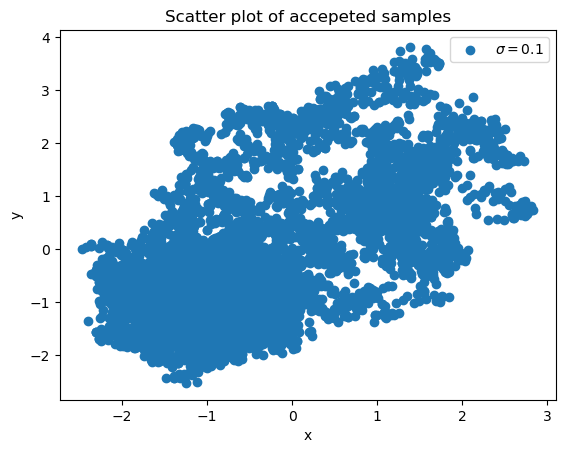

The Acceptance rate is 0.9132


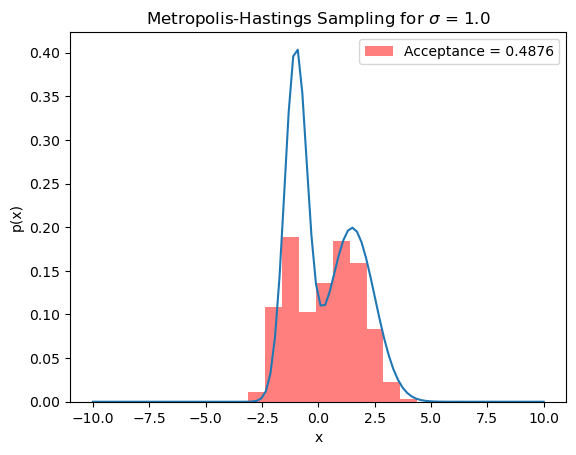

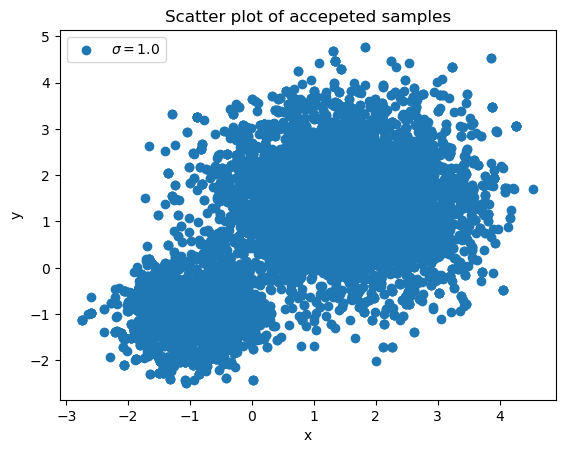

The Acceptance rate is 0.4876


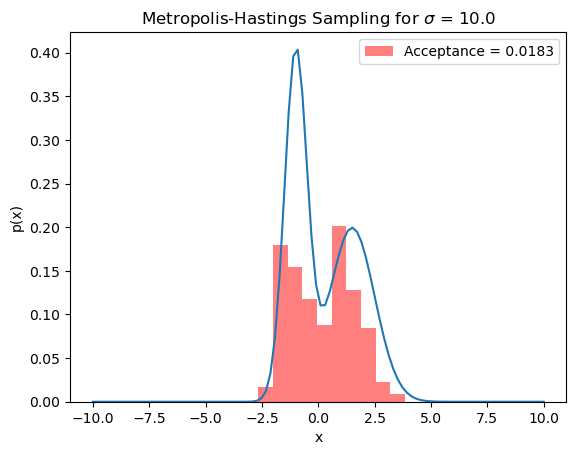

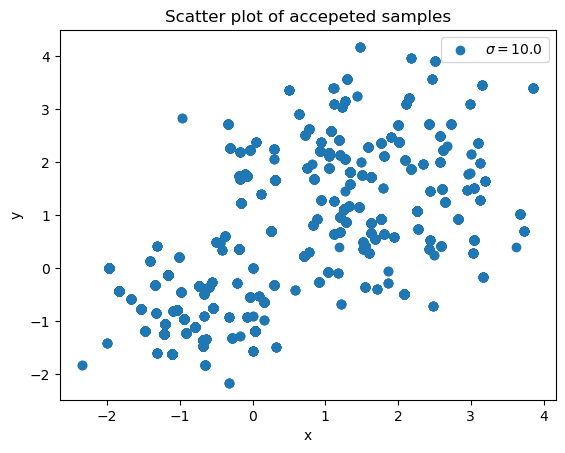

The Acceptance rate is 0.0183


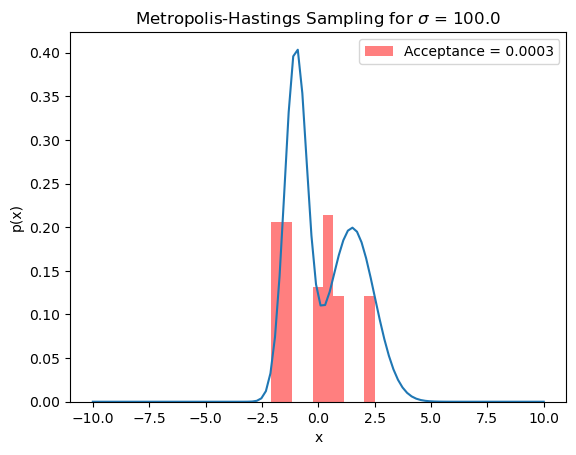

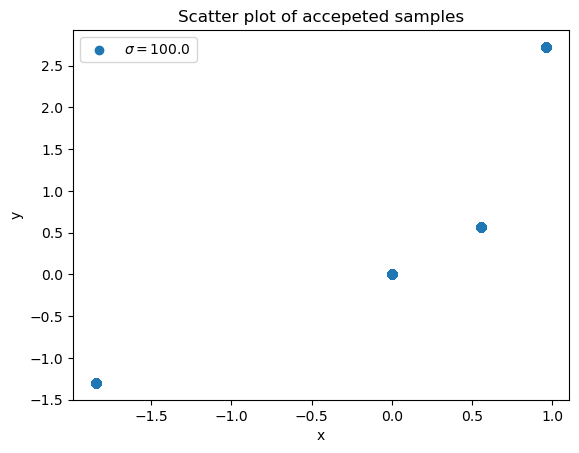

The Acceptance rate is 0.0003


In [5]:
N_sample = 10000
sigma_vals = np.array([0.01, 0.1, 1, 10, 100]) 

for sigma in sigma_vals:
    MetropolisHastings(pdf_bimodal, N_sample, (0,0), sigma,plotting=True, chain=True)

# Ranges of $\sigma$
Low values of sigma. don't explore the pdf space well enough. The samples probe one population of the bimodal although they accept most samples <br>
High values of sigma, explore too much of one bin, we're not iterating over unqiue samples. So the acceptance rate is low since most samples fall outside of the bimodal distribution.

----
We also notice from the scatter plots, for good values of sigma we probe two distinct populations in the distribution.

# Burn In phase
We see during the burn in phase, the MH algorithm overfits the bins, and isn't exploring the parameter space within the bounds. This happned for 1 larger order of magnitude than $\sigma$.

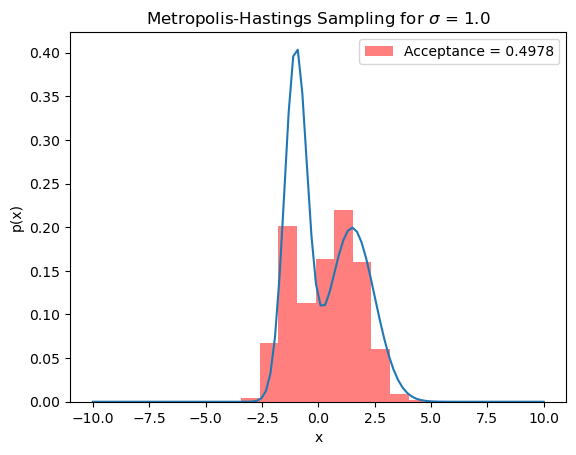

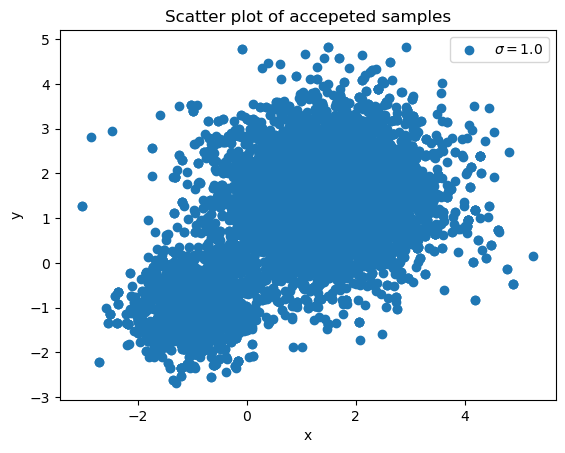

The Acceptance rate is 0.4978


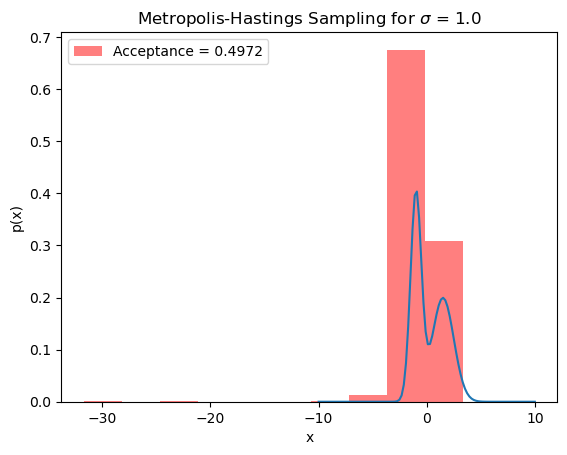

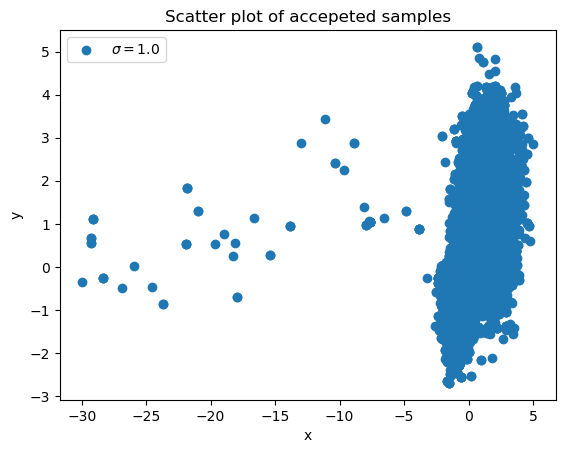

The Acceptance rate is 0.4972


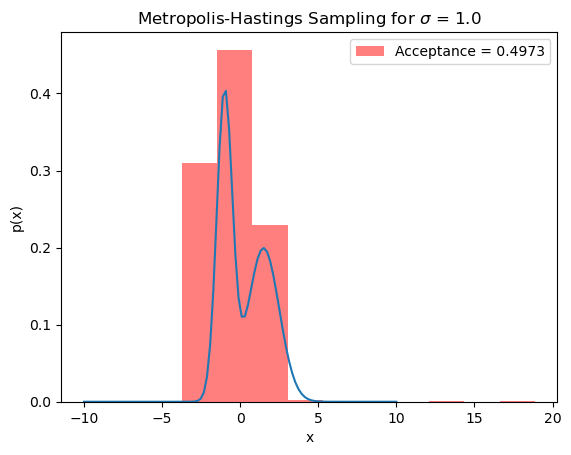

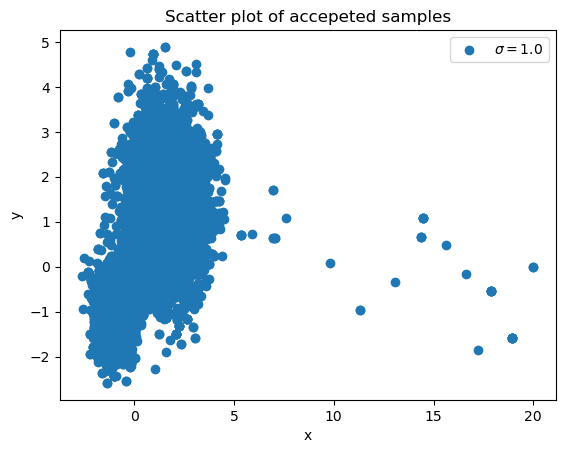

The Acceptance rate is 0.4973


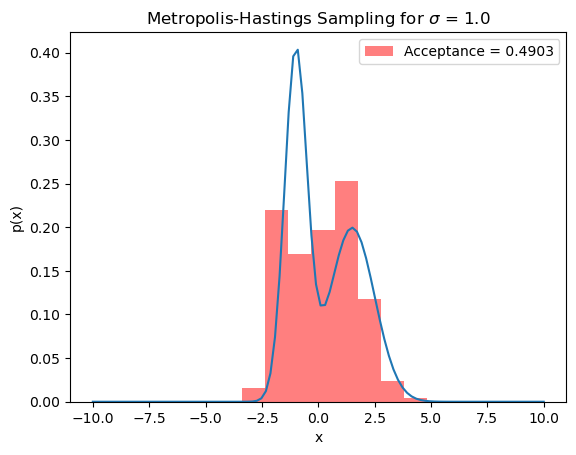

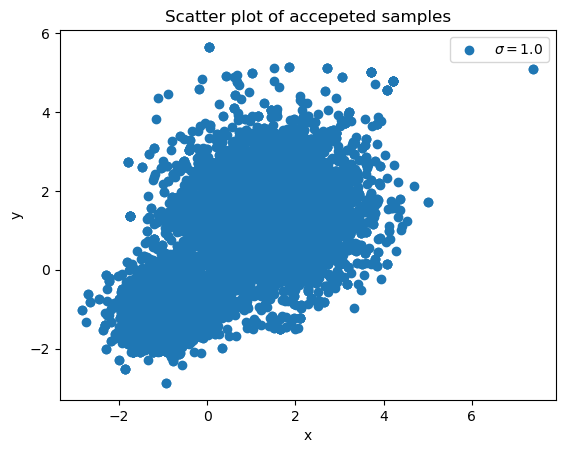

The Acceptance rate is 0.4903


In [6]:
init_vectors = [0 ,0], [-30,0], [20,0], [8,5]
for vector in init_vectors:
    MetropolisHastings(pdf_bimodal, N_sample, vector, 1.0,True,chain=True)

3. Compare your results with the true distribution using 1-dim histograms (both in $x_1$ and $x_2$ direction) (3 points)

- Discuss qualitatively whether the true distribution can be recovered for reasonable values of $\sigma$.
- Again, what happens if $\sigma$ is too large or too small?  Is what you see supporting your observations in the previous question?
- Define a function to generate the one dimensional highest posterior density intervals (HPDI) for both parameters at a certain credible level of a given probability density function. Then, calculate the HPDI for the given bimodal distribution at a $68.5\%$ credible level and plot your results.

Note: you have to write your own marginal distributions for `pdf_bimodal`, projected either on `x1` or on `x2` (do these two marginals differ in our case?).

Hints: use `plt.hist` with 100 bins and `density = True`

In [7]:
from scipy.stats.contingency import margins

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


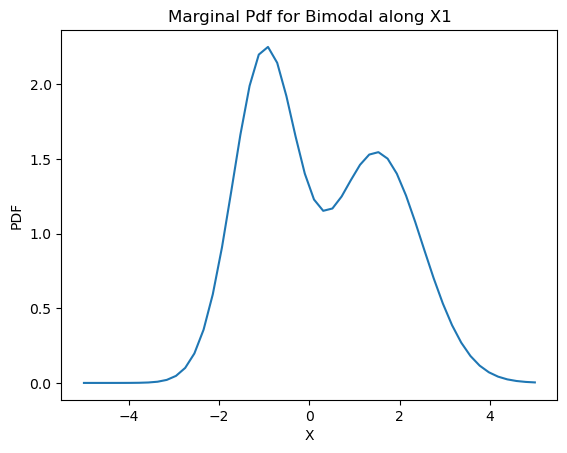

In [8]:
def mvgauss(x, mu, sigma):
    det = np.linalg.det(sigma) # calculate the determinate of the matrix
    inv = np.linalg.inv(sigma)
    D = 2
    #the coefficent outside the expoential
    coeff = 1/((det**0.50))*(2*np.pi)**(D/2)
    #calculate the matriricies
    mtrx_A = np.dot(np.transpose(x-mu),inv)
    mtrx_B = np.dot(mtrx_A, (x-mu))
    
    return coeff*np.exp(-0.5*mtrx_B)

mu1 = np.array([1.5,1.5])
sigma1 = np.array([[1,0],
                  [0,1]])

mu2 = np.array([-1,-1])
sigma2 = np.array([[0.5,0],
                  [0,0.5]])

def calculate_mvgauss(mu1,mu2,sigma1,simga2, sigma_label):
    '''I copied my plotting code to get the mvgaussian array'''
    # Generate grid of points
    x = np.linspace(-5,5)
    y = np.linspace(-5,5)
    X, Y = np.meshgrid(x, y)
   # points = np.vstack([X.ravel(), Y.ravel()])

    
    # Compute PDF values at grid points
    Z1 = [mvgauss([x_val,y_val], mu1, sigma1) for x_val,y_val in zip(np.ravel(X),np.ravel(Y))]
    Z1 = np.array(Z1) # convert to numpy array
    Z1 = Z1.reshape(X.shape)

    Z2 = [mvgauss([x_val,y_val], mu2, sigma2) for x_val,y_val in zip(np.ravel(X),np.ravel(Y))]
    Z2 = np.array(Z2) # convert to numpy array
    Z2 = Z2.reshape(X.shape)
    #make a pdf
    a = margins(Z1+Z2)
    plt.plot(x, a[0]/len(a[0]))

    plt.xlabel("X")
    plt.ylabel("PDF") 
    plt.title("Marginal Pdf for Bimodal along X1")
    return None
the_margins_1 = calculate_mvgauss(mu1, mu2,sigma1, sigma2, "Sigma_1")


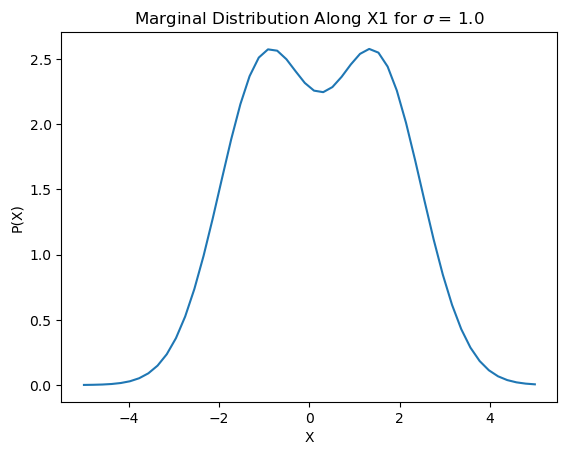

In [9]:
def bimodal_1d(x,sigma):
    '''I copied the bimodal and removed the .sum() to make it 1d'''
    sigma1 = sigma
    sigma2 = sigma
    pdf = 0.5/(np.sqrt(2*np.pi*sigma1**2))*np.exp(-0.5*((x-1.5)**2).sum()/sigma1**2)  +  0.5/(np.sqrt(2*np.pi*sigma2**2))*np.exp(-0.5*((x+1.0)**2).sum()/sigma2**2)
    return pdf
def true_pdf(sigma,pdf_func):
    # Generate grid of points
    x = np.linspace(-5,5)
    y = np.linspace(-5,5)
    X, Y = np.meshgrid(x, y)

    Z = [bimodal_1d(np.array([x_val,y_val]),sigma) for x_val,y_val in zip(np.ravel(X),np.ravel(Y))]
    
    Z = np.array(Z) # convert to numpy array
         
    Z = Z.reshape(X.shape)
    #make a pdf
    a = margins(Z)
    #plt.hist(a[0],bins=100,density=True)
    plt.plot(x, a[0])
    plt.xlabel("X")
    plt.ylabel("P(X)")
    plt.title("Marginal Distribution Along X1 for $\sigma$ = "+str(sigma))
    return None
true_pdf(1.0,bimodal_1d)

The Acceptance rate is 0.5113


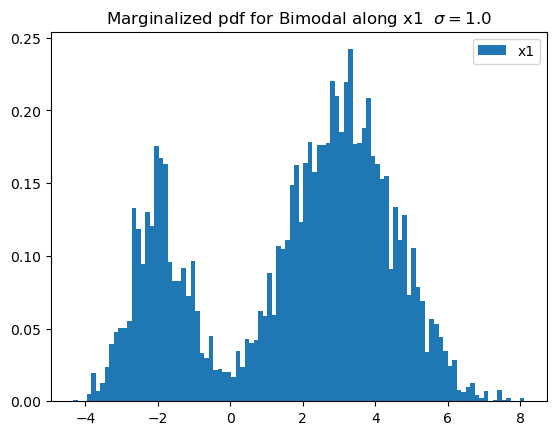

In [10]:
from scipy.stats.contingency import margins
bimoal_hist = array # for clarity
#x1 direction
x_MH = MetropolisHastings(pdf_bimodal,10000,(0,0),sigma=1.0,plotting=False,chain=False)
a = margins(x_MH)
plt.hist(a[0],label='x1',bins=100,density =True)
plt.title(f"Marginalized pdf for Bimodal along x1 " + ' $\sigma = 1.0$')# bins=100,density=True)#,label='Bimodal')
plt.legend()
plt.show()

1 did this questions three different ways its so confusing
worked with Raghavan
- The first way is with assignment 1 and the MV gaussian, i added two of them together with the defined mean and variances from the beginning
- The second one is along 1 dimension only and can vary with sigma
- The third is to use my MH algorithm and bin the data with the margins function
- The desceiption stays true below

The true distribution can be recovered for sigma defined near what is given in the bimodal in our case $\sigma = 1$
Similar for the previous cases low $\sigma$ doesn't explore the space enough so you get multple peaks close by, 
Large $\sigma$ doesn't probe inside the bimodal space so so peaks are districnt enough

# Define a function to generate the one dimensional highest posterior density intervals (HPDI) for both parameters at a certain credible level of a given probability density function. Then, calculate the HPDI for the given bimodal distribution at a $68.5\%$ credible level and plot your results.

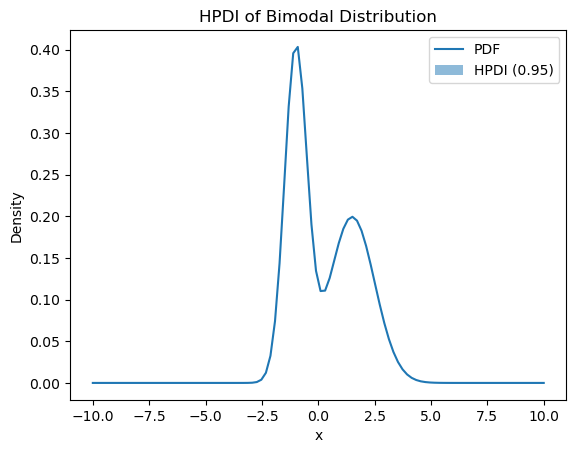

In [11]:
def compute_hpdi(samples, pdf, alpha=0.95):
    sorted_samples = np.sort(samples)
    n = len(sorted_samples)
    num_interval = int((1 - alpha) * n)
    interval_widths = sorted_samples[num_interval:] - sorted_samples[:n-num_interval]
    hpdi_index = np.argmin(interval_widths)
    hpdi_start = sorted_samples[hpdi_index]
    hpdi_end = sorted_samples[hpdi_index + num_interval]
    return hpdi_start, hpdi_end


# Def
samples = np.random.normal(1, 0.5, 10000)


# Calculate HPDI
alpha = 0.95
hpdi_start, hpdi_end = compute_hpdi(samples, pdf_bimodal, alpha)
x = np.linspace(-10,10,100)
array = np.array([pdf_bimodal(xi) for xi in x])
# Plotting HPDI
plt.plot(x,array, label='PDF')
plt.fill_between(x, array, where=(array >= hpdi_start) & (x <= hpdi_end), alpha=0.5, label=f'HPDI ({alpha})')
plt.title('HPDI of Bimodal Distribution')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()

Usage of AI: *I asked chatgpt how to make a D dimension isotropic gaussian,the plotting template in my MH algorithm, and all of HPDI.everything else was mine *

### 3.3 Conditional independence and reparametrization (4 points)

*Topics: Independence and Conditional independence*

**Reading material: Murphy 10.1.2**

1. Reparametrization (2 points). In class we introduced the KL divergence
$$
D_{KL}(q \mid p) \equiv \int dx\; q(x) \ln\frac {q(x)}{p(x)}
$$
Show that it is reparametrization invariant, if we replace $x$ with another random variable $y = f(x)$, where $f(x)$ is strictly monotonic and differentiable.  Start by quoting $q(y)$ and $p(y)$ in terms of $q(x)$ and $p(x)$.

Show a change of variables 

$$
q(y) = q(x)\frac{dx}{dy} 
$$
$$
p(y) = p(x)\frac{dx}{dy} 
$$
And we know $\frac{dx}{dy}$ increases monotonically and differentiable Plug in both expressions to the integral
$$
D_{KL}(q \mid p) \equiv \int dx\; \frac{dy}{dx} q(y) \ln\frac {\frac{dy}{dx}q(y)}{\frac{dy}{dx}p(y)}
$$
Cancel out terms
$$
D_{KL}(q \mid p) \equiv \int dy\; q(y) \ln\frac {q(y)}{p(y)}
$$
We see that KL-divergence is reparametrization invariant.

2. Conditional independence (2 points). Consider the graphical model defined by $p(x, y, z) = p(x \mid y) p(y \mid z) p(z)$. Show explicitly, by using the relevant definitions, that
- $x$ and $z$ are conditionally independent given $y$
- $z$ and $x$ are conditionally independent given $y$ -Typo

$p(x, y, z) = p(x \mid y) p(y \mid z) p(z)$
Use Baye"s Theroem to rewrite $p(y \mid z) p(z)$

$$
p(z |y)p(y) = p(y|z)p(z)
$$
$$
p(x, y, z) =p(x|y) p(z|y)p(y)
$$
Marginalize over y
$$
p(x,z,|y) = \frac{p(x,y|z)}{p(y)} = p(x|y) p(z|y)
$$
We see that x and z are conditionally independent given y

Usage of AI: *None*

## Chapter 4: Linear regression (10 points)


### 4.1  Regularized Regression (10 points)


In [12]:
import numpy as np
import math
import matplotlib.pyplot as plt
#plt.style.use(['dark_background']) # if using dark background, easier to see the plots

$\newcommand{\bPhi}{\mathbf{\Phi}}$
$\newcommand{\bx}{\mathbf{x}}$
$\newcommand{\bw}{\mathbf{w}}$
$\newcommand{\bt}{\mathbf{t}}$
$\newcommand{\by}{\mathbf{y}}$
$\newcommand{\bm}{\mathbf{m}}$
$\newcommand{\bS}{\mathbf{S}}$
$\newcommand{\bI}{\mathbf{I}}$

*Topics: Regularized regression*

**Reading Material: Ref: Murphy 7.5**

1. (2 points) $$\\ $$
Write a method `gen_sine(N)` that generates toy data like in the figure below. The method should have a parameter $N$, and should return $N$-dimensional vectors $\bx$ and $\bt$, where $\bx$ contains evenly spaced values from (0,1), and the elements $t_i$ of $\bt$ are distributed according to
$$t_i \sim \mathcal{N}(\mu_i, \sigma^2),$$
with the mean given by $\mu_i = \sin( 2 \pi x_i)$ and the standard deviation $\sigma=0.25$. Here $x_i$ is the $i$-th element of $\bf{x}$. You can make use of `np.random.normal()`.

Test your function by generating a plot similar to the one below:

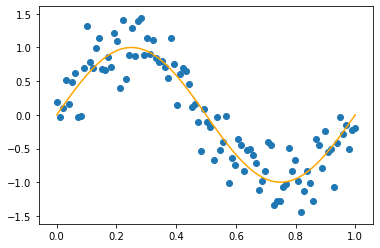

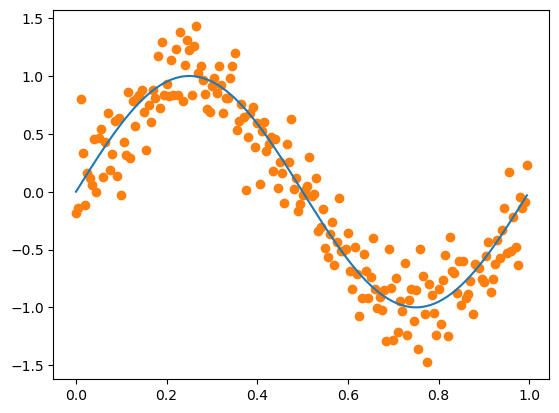

In [13]:
def gen_sine(n):
    x = np.arange(0,1,1/n) #make an evenly spaced n sized array 
    #make an array of elements sampled around a normal distribution
    t = np.array([np.random.normal(loc = np.sin(2*np.pi * xi), scale = 0.25) for xi in x])
    return x,t
my_sin = gen_sine(200)
plt.plot(my_sin[0], np.sin(2*np.pi*my_sin[0]))
plt.scatter(my_sin[0], my_sin[1], color='tab:orange')
plt.show()

2. (2 points) $$\\ $$  Write a method that finds the regularized $M$-th order polynomial for some fixed dataset $\bx$. Your method should include the regularizer weight $\lambda$ as a parameter and return a vector $\bw$ with the maximum-likelihood parameter estimates.
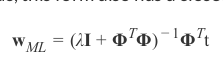

In [14]:
def fit_polynomial_reg(lam,order,x_data, t_data):
    
    design_matrix = np.column_stack([x_data**i for i in range(order + 1)])

    # do design transope by design
    first_operation = np.dot(design_matrix.T,design_matrix)
    #add identity and invert
    second_operation =np.linalg.inv(lam*np.identity(order+1) + first_operation)
    #multiply by design theta and t dataset
    third_operation = np.dot(design_matrix.T, t_data)
    #w_ml = np.linalg.solve(second_operation,third_operation)
    w_ml = np.dot(second_operation, third_operation)
    return w_ml
lam = 1.0
order = 3
x_data = my_sin[0]
t_data = my_sin[1]
test = fit_polynomial_reg(lam,order, x_data, t_data)



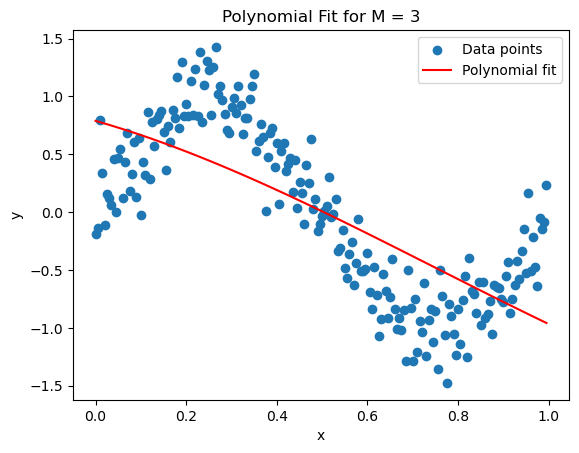

In [15]:
def plot_ploynomial_reg(x_data, t_data, params,N,plotting):
    x_values = np.linspace(min(x_data), max(x_data), N)
    #i don't understand why [::-1] works but chatgpt said it does
    #i tried with just params and it didn't work
    y_values = np.polyval(params[::-1], x_values)
    
    #label the order
    M = str(len(params)-1)
    if plotting == True:
    # Plot the data points and the polynomial curve
        plt.scatter(x_data, t_data, label='Data points')
        plt.plot(x_values, y_values, color='red', label='Polynomial fit')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Polynomial Fit for M = '+M)
        plt.legend()
        plt.show()
    return y_values
test2 = plot_ploynomial_reg(x_data, t_data, test,100,True)

3. (2 point) $$\\ $$  Use your ``` gen_sine``` method to generate 25 datapoints as "training set", and another 25 datapoints as "test set", under the same conditions as before.  Then, fit polynomials of $M \in (0,2,3,9, 20)$ for values $\lambda = 0$ (unregularized case) to your test set. Plot your results, showing the polynomials, the test and the training set simultaneously.

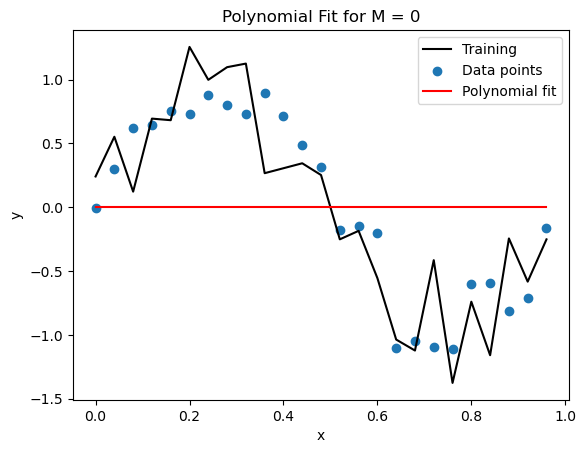

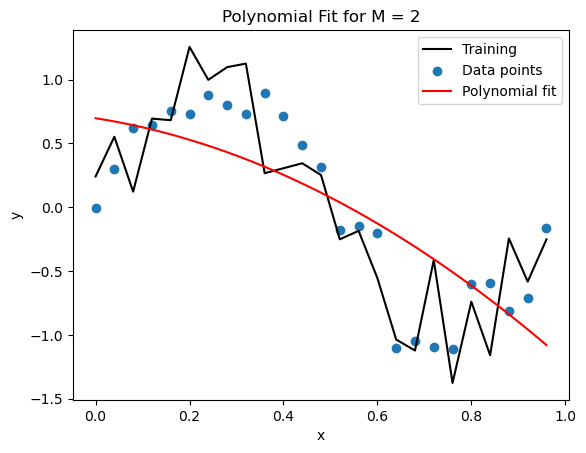

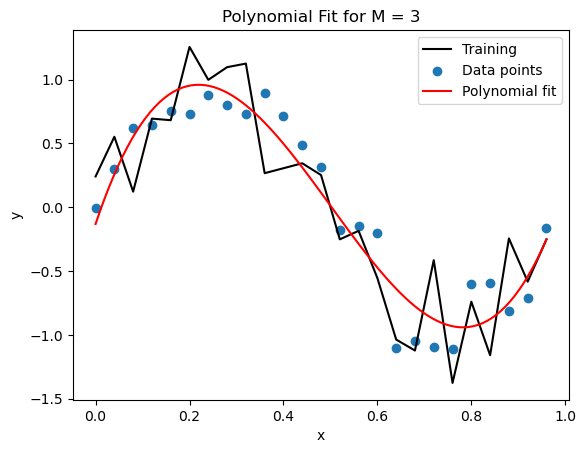

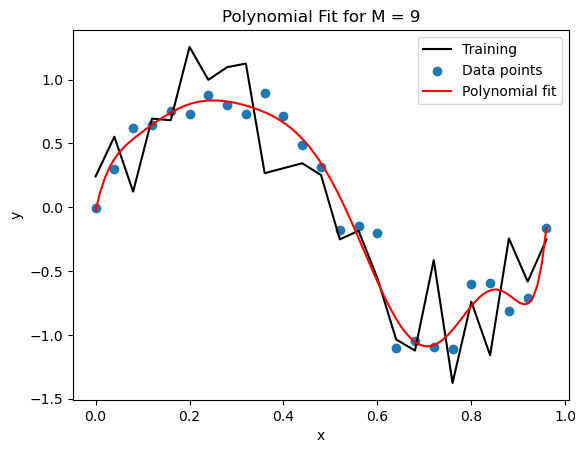

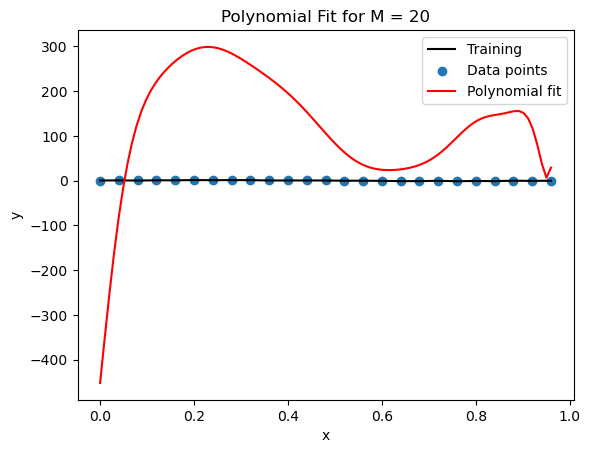

In [16]:
#YOUR CODE HERE
train_set = gen_sine(25)

test_set = gen_sine(25)

M_array = np.array([0,2,3,9,20])
lam= 0.0
for M in M_array:
    plt.plot(train_set[0], train_set[1],label='Training',color='k')
    w_ml =fit_polynomial_reg(lam,order=M,x_data=test_set[0], t_data=test_set[1])
    
    plot_ploynomial_reg(x_data=test_set[0], t_data=test_set[1],params=w_ml,N=100,plotting=True)


4. (2 points)

  For the above fits with $\lambda=0$ (unregularized case) calculate the reduced chi-squared statistics for each $M$ both for the training and the test set.
$$
\chi_\nu^2 = \frac{\chi^2}{\nu},
$$
$$
\chi^2 = \sum_i \frac{(O_i - C_i)^2}{\sigma_i^2}.
$$
Plot the $\chi^2$ values for both training and test set as function of $M$. What do you observe?

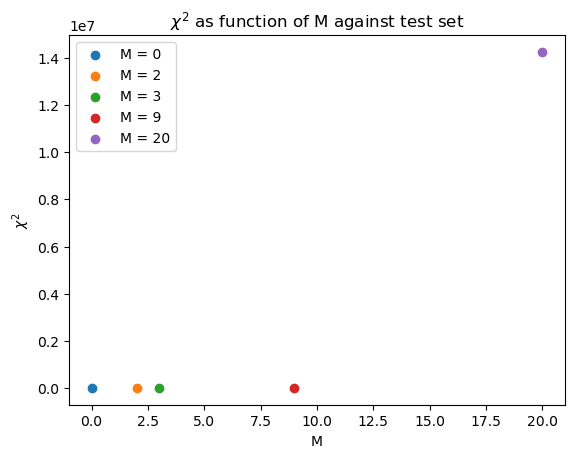

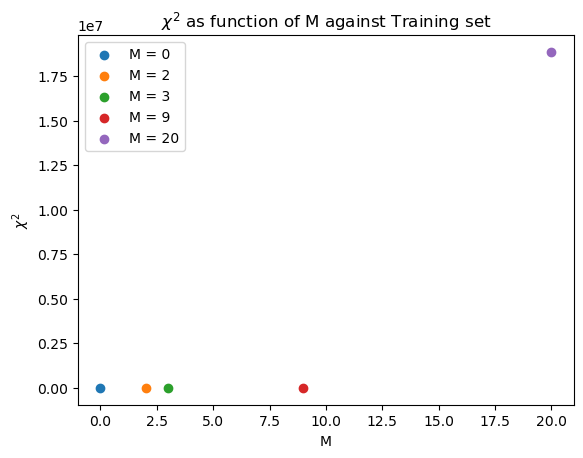

In [17]:
#YOUR CODE HERE
def red_chi_squared(obs,calc,sigma,order):
    #calcluate dof = number of pbservations - order
    dof = len(obs) - order
    chi_sqr_arr = []
   # sigma_arr = sigma*np.ones(len(obs)) # make an array of std dviations
    for i in range(len(obs)):
        chi_sqr_val = (obs[i] - calc[i])**2 /(sigma**2)
        chi_sqr_arr.append(chi_sqr_val)
    chi_sqr= np.sum(np.array(chi_sqr_arr)) #calculate chi_sqr
    red_chi_sqr = chi_sqr/dof
    return chi_sqr, red_chi_sqr
sigma =0.25
#do chi square test againt test data
for M in M_array:
    w_ml =fit_polynomial_reg(lam,order=M,x_data=test_set[0], t_data=test_set[1]) 
    y_values = plot_ploynomial_reg(x_data=test_set[0], t_data=test_set[1],params=w_ml,N=25,plotting=False)
    
    chi_sqr, red_chi_sqr = red_chi_squared(y_values, test_set[1],sigma, order=M)
    plt.scatter(M, chi_sqr, label=f"M = {M}")
    plt.legend()
    plt.ylabel('$\chi^2$')
    plt.xlabel('M')
    plt.title("$\chi^2$ as function of M against test set")
plt.show()
#now repeat for the training data
for M in M_array:
    w_ml =fit_polynomial_reg(lam,order=M,x_data=train_set[0], t_data=train_set[1]) 
    y_values = plot_ploynomial_reg(x_data=train_set[0], t_data=train_set[1],params=w_ml,N=25,plotting=False)
    
    chi_sqr, red_chi_sqr = red_chi_squared(y_values, train_set[1],sigma, order=M)
    plt.scatter(M, chi_sqr, label=f"M = {M}")
    plt.legend()
    plt.ylabel('$\chi^2$')
    plt.xlabel('M')
    plt.title("$\chi^2$ as function of M against Training set")

The $\chi^2$ seems to decrease with high orders of polynomials. But this doesn't make sense for M=20 since this is an obvious overfit.
it should be minimized for M=9

5. (2 point) $$\\ $$  For $M=9$, repeat the previous exercise, but instead of varying $M$ you now vary $\lambda\in (0,10^{-5}, 10^{-3}, 10^{-2}, 100)$. Plot and discuss your results.  What is happening to the coefficents $\bw$ as you increase $\lambda$? Which value of $\lambda$ is most appropriate for the model $M=9$? Why?


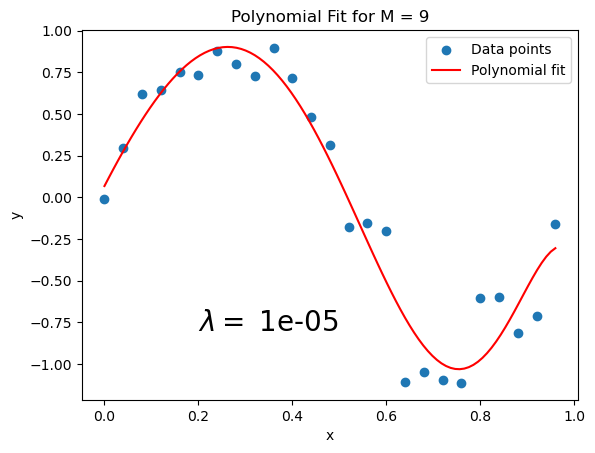

[  0.06833381   5.44342268  -4.91049882 -13.5029021   -6.9863024
  12.47966242  17.47094793   6.53469845  -7.2621557   -9.69704054]


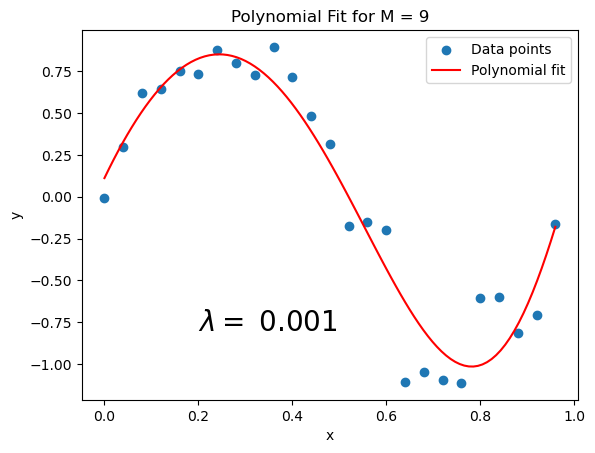

[  0.11148772   5.84894101 -10.3999307   -5.43444549   1.42726927
   5.12571308   5.34283823   3.10581469  -0.45421752  -4.46690752]


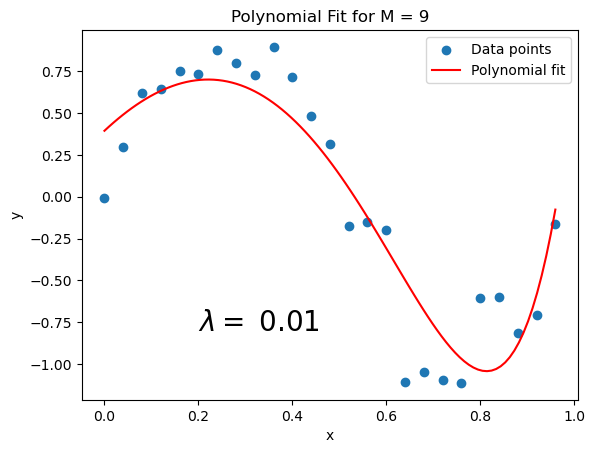

[ 0.39428593  2.61996342 -4.86816145 -3.18352745 -0.58088104  1.09484421
  1.75945918  1.70489483  1.22602781  0.54101675]


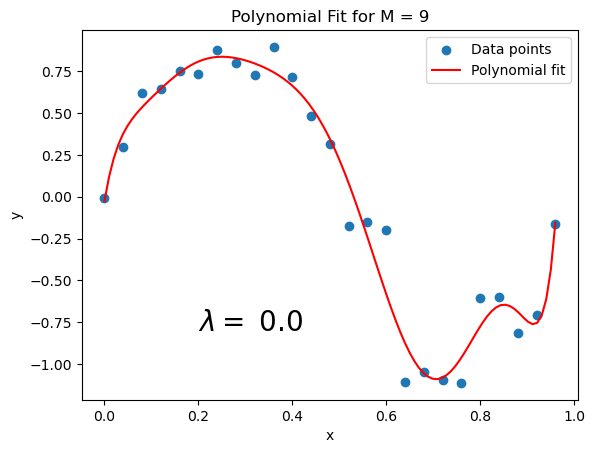

[-2.63456738e-02  1.70065123e+01 -2.47578528e+02  2.32313728e+03
 -1.26890961e+04  4.09945090e+04 -7.94343215e+04  9.00375497e+04
 -5.47558510e+04  1.37576355e+04]


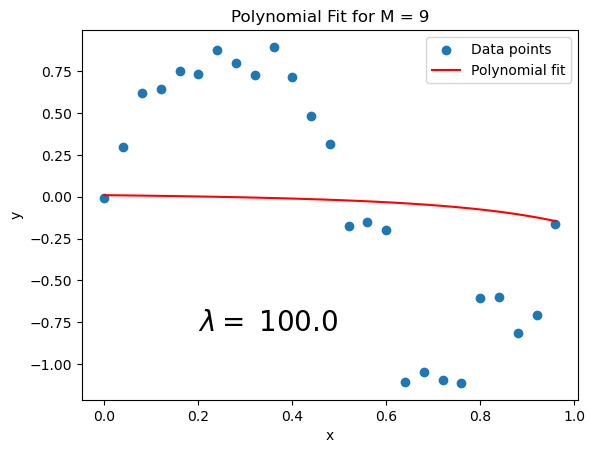

[ 0.00940095 -0.03114257 -0.03281751 -0.02813411 -0.02306059 -0.0187583
 -0.01532528 -0.01262757 -0.01050615 -0.00882585]


In [18]:
lam_array = np.array([1e-5,1e-3,1e-2,0,100])
M= 9
for lam in lam_array:
    lam_label = '$\lambda = $ ' +str(lam)
    plt.text(0.2,-0.8,s=lam_label,fontsize=20)
    w_ml =fit_polynomial_reg(lam,order=M,x_data=test_set[0], t_data=test_set[1])
    plot_ploynomial_reg(x_data=test_set[0], t_data=test_set[1],params=w_ml,N=100,plotting=True)
    print(w_ml) #the coefficents

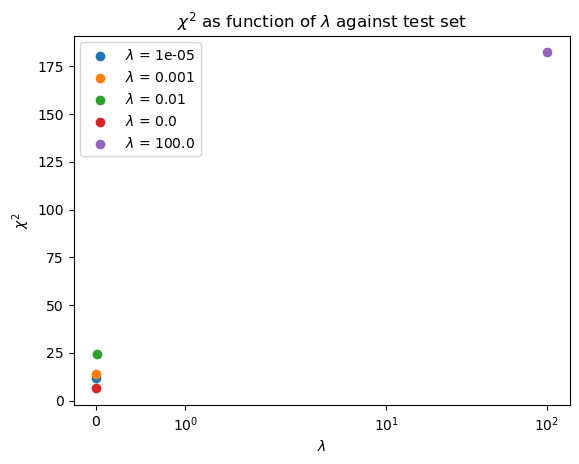

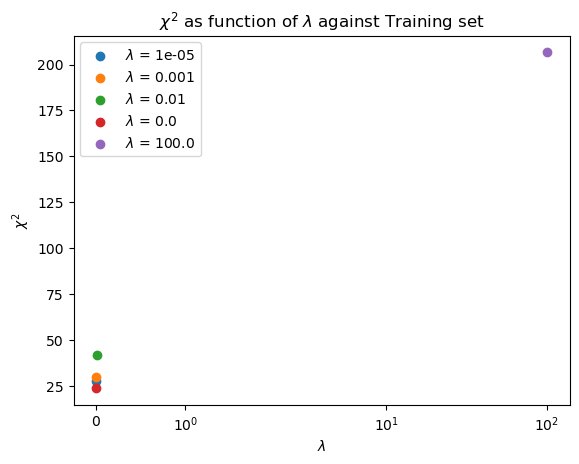

In [19]:
for lam in lam_array:
    w_ml =fit_polynomial_reg(lam,order=9,x_data=test_set[0], t_data=test_set[1]) 
    y_values = plot_ploynomial_reg(x_data=test_set[0], t_data=test_set[1],params=w_ml,N=25,plotting=False)
    
    chi_sqr, red_chi_sqr = red_chi_squared(y_values, test_set[1],sigma, order=M)
    plt.scatter(lam, chi_sqr, label=f"$\lambda$ = {lam}")
    plt.legend()
    plt.ylabel('$\chi^2$')
    plt.xscale('symlog')
    plt.xlabel('$\lambda$')
    plt.title("$\chi^2$ as function of $\lambda$ against test set")
plt.show()
#now repeat for the training data
for lam in lam_array:
    w_ml =fit_polynomial_reg(lam,order=9,x_data=train_set[0], t_data=train_set[1]) 
    y_values = plot_ploynomial_reg(x_data=train_set[0], t_data=train_set[1],params=w_ml,N=25,plotting=False)
    
    chi_sqr, red_chi_sqr = red_chi_squared(y_values, train_set[1],sigma, order=M)
    plt.scatter(lam, chi_sqr, label=f"$\lambda$ = {lam}")
    plt.legend()
    plt.xscale('symlog')
    plt.ylabel('$\chi^2$')
    plt.xlabel('$\lambda$')
    plt.title("$\chi^2$ as function of $\lambda$ against Training set")

$\lambda = 0.0$ seems to be the best-fit since it maps local changes in y the best between points, the coefficents of $\textbf{W}$ seem to decrease in magnitude.

Usage of AI: *I asked chatgpt how to make a design matrix, also see plot_polynomial_reg() function for more details*